In [1]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
# Read Movies csv File

moviesFP = r'C:\Users\kumar\OneDrive\Documents\Projects\MovieLens\data\external\movies.csv'
moviesDF = pd.read_csv(moviesFP)
moviesDF.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Read Ratings CSV File

ratingsFP = r'C:\Users\kumar\OneDrive\Documents\Projects\MovieLens\data\external\ratings.csv'
ratingsDF = pd.read_csv(ratingsFP)
ratingsDF.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# Read Tasg CSV File

tagsFP = r'C:\Users\kumar\OneDrive\Documents\Projects\MovieLens\data\external\tags.csv'
tagsDF = pd.read_csv(tagsFP)
tagsDF.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [5]:
# Merge all Data Files - Common Id is UserId and MovieId

tempDF = pd.merge(ratingsDF,tagsDF,on=['userId','movieId'],how='left')
mergedDF = pd.merge(tempDF,moviesDF,on=['movieId'],how='left')
mergedDF.head()

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [6]:
# some information about Datasets

mergedDF.describe()

,userId,movieId,rating,timestamp_x,timestamp_y
count,102677.000000,102677.000000,102677.000000,1.026770e+05,3.476000e+03
mean,327.761933,19742.712623,3.514813,1.209495e+09,1.323525e+09
std,183.211289,35884.400990,1.043133,2.170117e+08,1.731554e+08
min,1.000000,1.000000,0.500000,8.281246e+08,1.137179e+09
25%,177.000000,1199.000000,3.000000,1.019138e+09,1.138032e+09
50%,328.000000,3005.000000,3.500000,1.186590e+09,1.279956e+09
75%,477.000000,8366.000000,4.000000,1.439916e+09,1.498457e+09
max,610.000000,193609.000000,5.000000,1.537799e+09,1.537099e+09


In [7]:
# Data Rows with Null Values

mergedDF.isna().sum()

userId             0
movieId            0
rating             0
timestamp_x        0
tag            99201
timestamp_y    99201
title              0
genres             0
dtype: int64

In [8]:
#To Count the number of movies in each genres
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [9]:
#here we  make census of the genres:
genre_labels = set()
for s in mergedDF['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [10]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(mergedDF, 'genres', genre_labels)
keyword_occurences

[['Drama', 43024],
 ['Comedy', 39622],
 ['Action', 31151],
 ['Thriller', 27175],
 ['Adventure', 24497],
 ['Romance', 18353],
 ['Sci-Fi', 17691],
 ['Crime', 17224],
 ['Fantasy', 11989],
 ['Children', 9285],
 ['Mystery', 7906],
 ['Horror', 7408],
 ['Animation', 7119],
 ['War', 4931],
 ['IMAX', 4258],
 ['Musical', 4170],
 ['Western', 1966],
 ['Documentary', 1259],
 ['Film-Noir', 880],
 ['(no genres listed)', 49]]

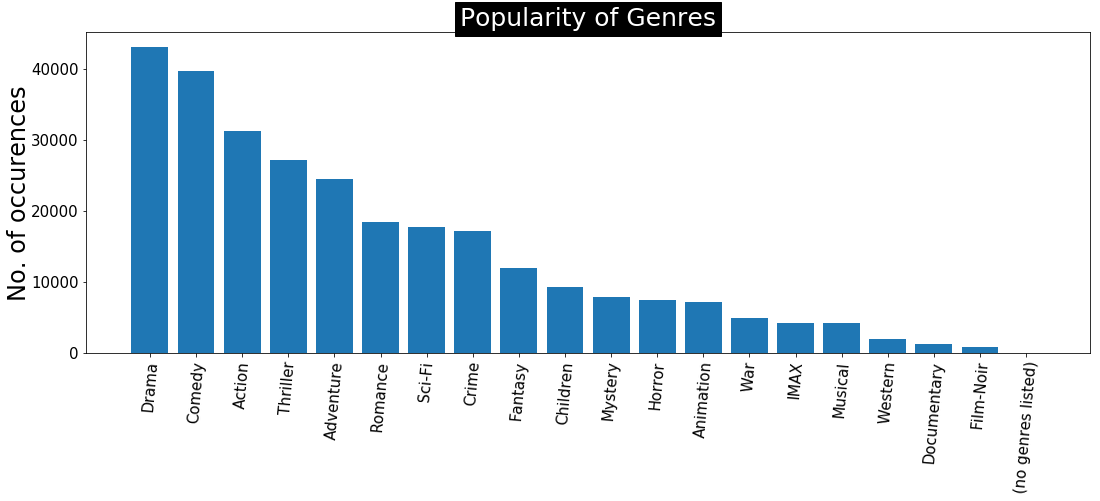

In [11]:
# Graph the Genres vs Occurrences
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in keyword_occurences]
x_axis = [k for k,i in enumerate(keyword_occurences)]
x_label = [i[0] for i in keyword_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

In [12]:
# Convert Genres in row to Columns
# New Column is created for every genre

tempDF = mergedDF

for (key,cnt) in keyword_occurences:
    tempDF.loc[tempDF['genres'].str.contains(key), key] = 1
    tempDF[key] = tempDF[key].fillna(0)


tempDF.head()

C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres,Drama,Comedy,...,Mystery,Horror,Animation,War,IMAX,Musical,Western,Documentary,Film-Noir,(no genres listed)
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),Comedy|Romance,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),Action|Crime|Thriller,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#tempDF = tempDF.drop(columns=['tag','title','genres','timestamp_y'])

# Drop Unncecessary Columns

tempDF = tempDF.drop(columns=['title','genres','timestamp_y'])

In [14]:
tempDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 25 columns):
userId                102677 non-null int64
movieId               102677 non-null int64
rating                102677 non-null float64
timestamp_x           102677 non-null int64
tag                   3476 non-null object
Drama                 102677 non-null float64
Comedy                102677 non-null float64
Action                102677 non-null float64
Thriller              102677 non-null float64
Adventure             102677 non-null float64
Romance               102677 non-null float64
Sci-Fi                102677 non-null float64
Crime                 102677 non-null float64
Fantasy               102677 non-null float64
Children              102677 non-null float64
Mystery               102677 non-null float64
Horror                102677 non-null float64
Animation             102677 non-null float64
War                   102677 non-null float64
IMAX                  10

In [19]:
tempDF['tag'] = tempDF['tag'].fillna('')

In [20]:
# Use tfidf for creating feature vectors tags

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(tempDF['tag'])

In [24]:
ftr = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
print(ftr)

         06  1900s  1920s  1950s  1960s  1970s  1980s  1990s  2001  250  \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0   
5       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0   
6       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0   
7       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0   
8       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0   
9       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0   
10      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0   
11      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0   
12      0.0    0.0    0.0

In [25]:
tempDF = tempDF.drop(columns=['tag'])

In [26]:
# Concat Features data to actual data

ftrDF = pd.concat([tempDF, ftr], axis=1)
ftrDF.head()

,userId,movieId,rating,timestamp_x,Drama,Comedy,Action,Thriller,Adventure,Romance,...,wrongful,wry,york,younger,zellweger,zither,zoe,zombie,zombies,zooey
0,1,1,4.0,964982703,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4.0,964981247,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,6,4.0,964982224,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,47,5.0,964983815,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,50,5.0,964982931,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Run K-means Clustering - with clusters count as 0
# 0 because of number of genres

from sklearn.cluster import KMeans
# Initializing KMeans
kmeans = KMeans(n_clusters=20)
# Fitting with inputs
kmeans = kmeans.fit(ftrDF)
# Predicting the clusters
labels = kmeans.predict(ftrDF)
# Getting the cluster centers
C = kmeans.cluster_centers_


In [48]:
## print(kmeans.predict(pd.DataFrame(ftrDF,index=[100])))
C


array([[ 2.74493899e+02,  4.02531256e+04,  3.52814753e+00, ...,
         1.70253622e-18, -1.03541307e-17,  8.52115145e-19],
       [ 3.51087478e+02,  4.97485623e+03,  3.44370702e+00, ...,
         1.06556745e-18,  1.59923237e-04,  5.33630757e-19],
       [ 2.69767265e+02,  8.25635672e+02,  3.66992931e+00, ...,
        -2.35475159e-19,  7.86046575e-19, -1.16890547e-19],
       ...,
       [ 2.91616362e+02,  3.73496446e+02,  3.54604567e+00, ...,
         1.32645360e-18, -8.87012902e-18,  6.64073831e-19],
       [ 3.18549317e+02,  5.84821987e+04,  3.43792267e+00, ...,
         2.03287907e-18, -1.16619496e-17,  1.01728657e-18],
       [ 3.17931914e+02,  8.89567303e+03,  3.46376585e+00, ...,
         1.16890547e-18, -8.23993651e-18,  5.85299767e-19]])

In [51]:
ftrDF.head()

,userId,movieId,rating,timestamp_x,Drama,Comedy,Action,Thriller,Adventure,Romance,...,wrongful,wry,york,younger,zellweger,zither,zoe,zombie,zombies,zooey
0,1,1,4.0,964982703,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4.0,964981247,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,6,4.0,964982224,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,47,5.0,964983815,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,50,5.0,964982931,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
   # To Print the Clusters
    import numpy as np
    
    clustersvdf=kmeans.fit_predict(ftrDF)
    #print clusters.shape
    cluster_0=np.where(clustersvdf==0)
    print(cluster_0)


In [90]:


list(np.where(clustersvdf==0))[0]


array([   942,    951,    972, ..., 101325, 101326, 101327], dtype=int64)

In [91]:
mergedDF.iloc[list(np.where(clustersvdf==0))[0]]

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres,Drama,Comedy,...,Mystery,Horror,Animation,War,IMAX,Musical,Western,Documentary,Film-Noir,(no genres listed)
942,7,3994,3.0,1161738301,NaN,NaN,Unbreakable (2000),Drama|Sci-Fi,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
951,7,4844,1.5,1161738352,NaN,NaN,Bandits (2001),Comedy|Crime|Romance,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
972,7,6534,0.5,1157949714,NaN,NaN,Hulk (2003),Action|Adventure|Sci-Fi,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
978,7,7155,3.0,1173051472,NaN,NaN,Calendar Girls (2003),Comedy,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
988,7,8783,1.0,1161738306,NaN,NaN,"Village, The (2004)",Drama|Mystery|Thriller,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,7,37741,3.5,1162163504,NaN,NaN,Capote (2005),Crime|Drama,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,7,38388,3.5,1149548381,NaN,NaN,Goal! The Dream Begins (Goal!) (2005),Drama,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1019,7,42002,4.5,1144806100,NaN,NaN,"Producers, The (2005)",Comedy|Musical,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1020,7,45499,4.0,1157949636,NaN,NaN,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1021,7,45517,4.5,1157066190,NaN,NaN,Cars (2006),Animation|Children|Comedy,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# Top 50 Movies in Cluster 0

mergedDF.iloc[list(np.where(clustersvdf==0))[0]]['title'].unique()[:50]

array(['Unbreakable (2000)', 'Bandits (2001)', 'Hulk (2003)',
       'Calendar Girls (2003)', 'Village, The (2004)', 'Capote (2005)',
       'Goal! The Dream Begins (Goal!) (2005)', 'Producers, The (2005)',
       'X-Men: The Last Stand (2006)', 'Cars (2006)',
       'Lake House, The (2006)', 'Lady in the Water (2006)',
       'Superman Returns (2006)', 'Departed, The (2006)',
       'Flags of Our Fathers (2006)',
       'Perfume: The Story of a Murderer (2006)', 'Casino Royale (2006)',
       'Déjà Vu (Deja Vu) (2006)', 'Holiday, The (2006)',
       'Dreamgirls (2006)', 'GoldenEye (1995)',
       'From Dusk Till Dawn (1996)', 'Braveheart (1995)',
       'Bad Boys (1995)', 'Desperado (1995)',
       'Shawshank Redemption, The (1994)', 'Forrest Gump (1994)',
       'Four Weddings and a Funeral (1994)', 'Speed (1994)',
       'Terminator 2: Judgment Day (1991)',
       'Independence Day (a.k.a. ID4) (1996)', 'Die Hard (1988)',
       'Mars Attacks! (1996)', 'Fifth Element, The (1997)',
 

In [ ]:
ftrDF = ftrDF.drop(columns='timestamp_x')

In [102]:
# Run K-means Clustering - with clusters count as 20
# 20 because of number of genres

from sklearn.cluster import KMeans
# Initializing KMeans
kmeanst = KMeans(n_clusters=20)
# Fitting with inputs
kmeanst = kmeans.fit(ftrDF)
# Predicting the clusters
labels = kmeanst.predict(ftrDF)
# Getting the cluster centers
centT = kmeanst.cluster_centers_

In [106]:
# To Print the Clusters
    
clustersTemp=kmeanst.fit_predict(ftrDF)
#print clusters.shape
cluster_0t=np.where(clustersTemp==0)
print(cluster_0t)

(array([   107,    108,    109, ..., 101579, 101580, 101581], dtype=int64),)


In [111]:
clustersTemp

array([16, 16, 16, ...,  3,  3,  3])

In [110]:
mergedDF.iloc[list(np.where(clustersTemp==0))[0]]['title'].unique()[:50]

array(['Starship Troopers (1997)', 'Big Lebowski, The (1998)',
       'Wedding Singer, The (1998)', 'Welcome to Woop-Woop (1997)',
       'Newton Boys, The (1998)', 'Wild Things (1998)',
       'Small Soldiers (1998)', 'All Quiet on the Western Front (1930)',
       'Rocky (1976)', 'Labyrinth (1986)', 'Lethal Weapon (1987)',
       'Goonies, The (1985)', 'Back to the Future Part III (1990)',
       'Bambi (1942)', 'Saving Private Ryan (1998)',
       'Black Cauldron, The (1985)', 'Flight of the Navigator (1986)',
       'Great Mouse Detective, The (1986)',
       'Honey, I Shrunk the Kids (1989)', 'Negotiator, The (1998)',
       'Jungle Book, The (1967)', 'Rescuers, The (1977)',
       'Return to Oz (1985)', 'Rocketeer, The (1991)',
       'Sleeping Beauty (1959)', 'Song of the South (1946)',
       'Tron (1982)', 'Indiana Jones and the Temple of Doom (1984)',
       'Lord of the Rings, The (1978)', "Charlotte's Web (1973)",
       'Secret of NIMH, The (1982)', 'American Tail, An (198

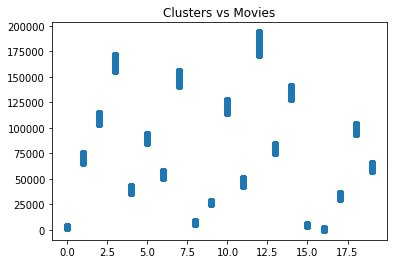

In [118]:
plt.title("Clusters vs Movies")
plt.scatter(clustersTemp,mergedDF['movieId'])

In [117]:
np.where(clustersTemp==19)

(array([   240,    241,    242, ..., 102200, 102201, 102202], dtype=int64),)

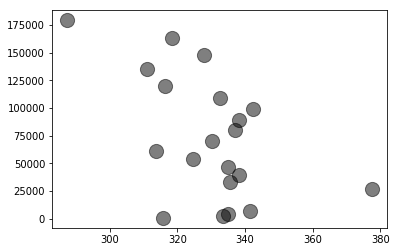

In [119]:


centers = kmeanst.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [127]:
np.where(clustersTemp==0)[0].size


22109